In [1]:
import numpy as np
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Строим ИКФ на основе методов Адамса

Возьмём несколько схем семейства Адамса и используем их коэффициенты для того, чтобы построить ИКФ.

При этом узлы будут равноотстоящими.

In [2]:
adams_coeffs = {
    1: [1],
    2: [-1 / 2, 3 / 2],
    3: [5 / 12, -4 / 3, 23 / 12],
    4: [-3 / 8, 37 / 24, -59 / 24, 55 / 24],
    5: [251 / 720, -637 / 360, 109 / 30, -1387 / 360, 1901 / 720]
}

In [3]:
def func(x, k):
    return x**k

Проверим на мономах.

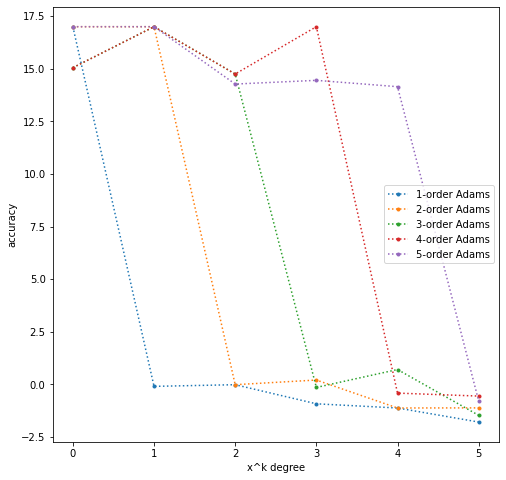

In [4]:
x0, x1 = -2, 3
degs = range(0, 6)

plt.figure(figsize=(8, 8))

n = 10  # кол-во точек
dx = (x1-x0) / n

for k, coeff in adams_coeffs.items():
    
    accs = []
    for deg in degs:
        int_ad = 0
        for i in range(1, n+1):
            int_ad += dx * np.array(coeff) @ func(np.array([x0 + dx*(i-k+j) for j in range(k)]), deg)
            
        int_ex = (func(x1, deg+1) - func(x0, deg+1)) / (deg+1)  # точное значение интеграла
        
        accs.append(-np.log10(np.clip(np.abs(int_ad - int_ex), 1e-17, np.inf)))
    plt.plot(degs, accs, '.:', label=f'{k}-order Adams')
plt.xlabel('x^k degree')
plt.ylabel('accuracy')
plt.legend();

Убеждаемся, что АСТ соответствующей ИКФ всегда на единицу меньше, чем порядок метода Адамса (почему?).